In [69]:
import os
import numpy as np

from Airfoils import airfoil as af

from Visualization import plotting as aplt
from Database.getresults import Database_2D

In [70]:
HOMEDIR = os.getcwd()

In [71]:
db = Database_2D(HOMEDIR)
airfoil = db.getAirfoils()[0]
reynolds = db.getReynolds(airfoil)[0]
polars = db.Data[airfoil][reynolds]


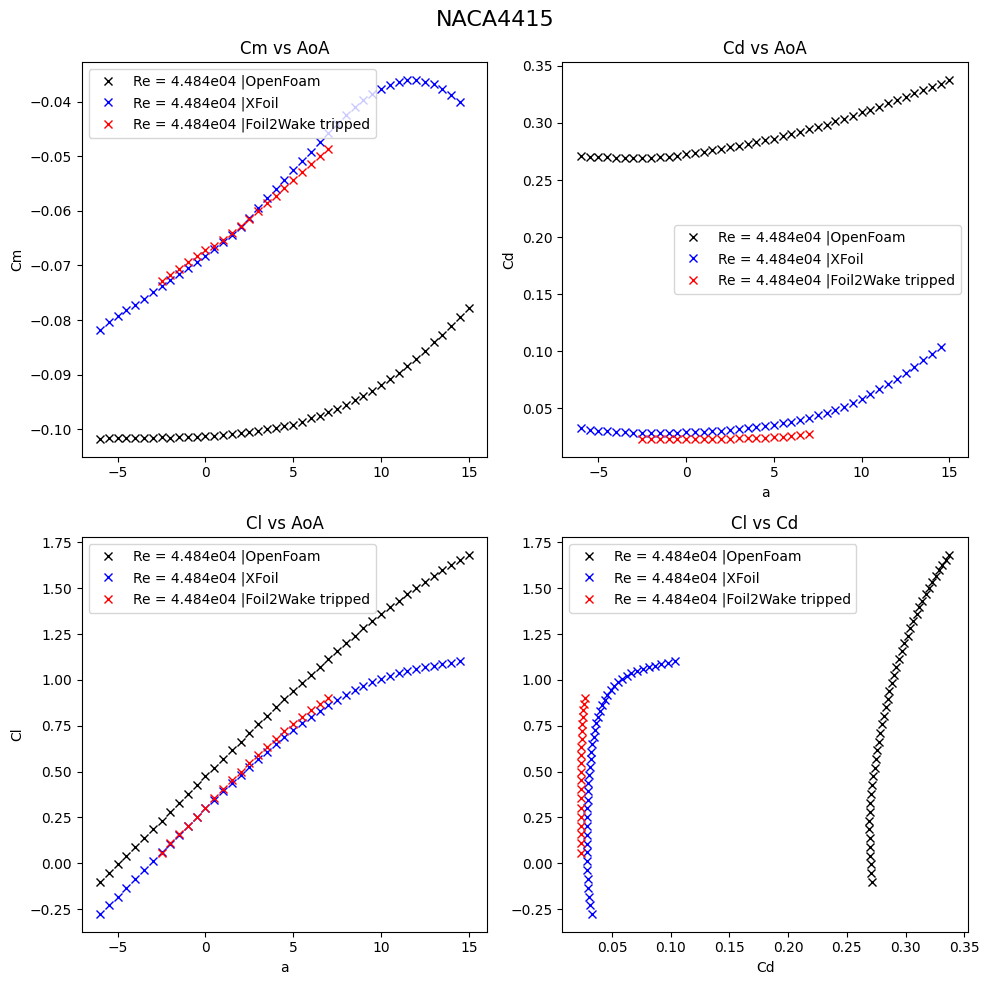

In [72]:
f2wD = [polars["Foil2Wake"].values, "rx", f"Re = {reynolds} |Foil2Wake tripped"]
Xfoil = [polars["Xfoil"].values, "bx", f"Re = {reynolds} |XFoil"]
openF = [polars["OpenFoam"].values, "kx", f"Re = {reynolds} |OpenFoam"]
aplt.plotAeorCoeffs([openF,Xfoil,f2wD],(10,10),airfoil)